Emotion Detection using Text 

Importing all Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords , wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
train_path = r"C:\Users\vedan\Desktop\PAML\Project\train.txt"
val_path = r"C:\Users\vedan\Desktop\PAML\Project\val.txt"
test_path = r"C:\Users\vedan\Desktop\PAML\Project\test.txt"

df_train_initial = pd.read_csv(train_path , names = ['Text' , 'Emotion'] , sep= ';')
df_val_initial = pd.read_csv(val_path , names = ['Text' , 'Emotion'] , sep= ';')
df_test_initial = pd.read_csv(test_path , names = ['Text' , 'Emotion'] , sep= ';')

In [4]:
print("Shape of the training dataset : ",df_train_initial.shape)
df_train_initial.head()

Shape of the training dataset :  (16000, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
print("Shape of the testing dataset : ",df_test_initial.shape)
df_test_initial.head()

Shape of the testing dataset :  (2000, 2)


,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
print("Shape of the validation dataset : ",df_val_initial.shape)
df_val_initial.head()

Shape of the validation dataset :  (2000, 2)


,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [7]:
# Fetching all the emotions and it's count present in the training dataset
emotions = df_train_initial['Emotion'].value_counts()
print(emotions)
print(f"Total entries in the training dataset : {emotions.sum()}")

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
Total entries in the training dataset : 16000


Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64


<Axes: xlabel='Emotion', ylabel='count'>

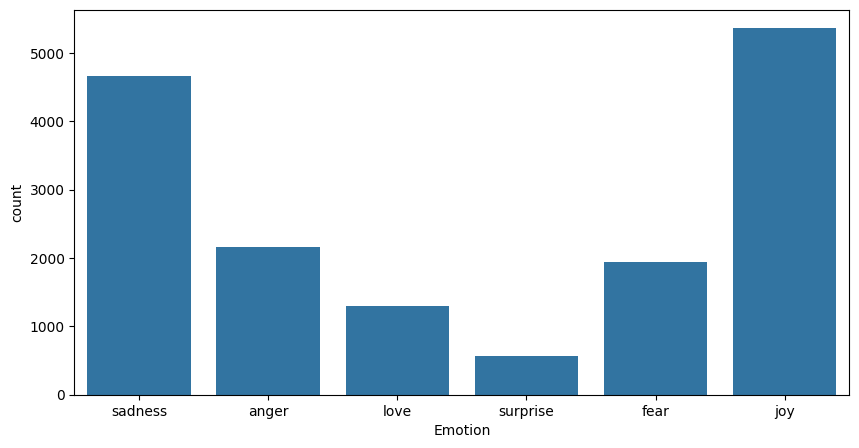

In [8]:
# Percentage of emotions present in the dataset
emotions_percentage = emotions/sum(emotions)*100
print(emotions_percentage)

# Plot the emotions vs it's count as a bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df_train_initial)

In [9]:
# To check if there are any null values present in the dataset
print(df_train_initial.isnull().sum())

Text       0
Emotion    0
dtype: int64


In [10]:
# Checking if there are any repeated texts in the training dataset
print("Repeated Statements  :",df_train_initial['Text'].duplicated().sum())
df_train_initial[df_train_initial['Text'].duplicated()]

Repeated Statements  : 31


,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [11]:
# Removing the duplicated values and storing it in a new dataframe
df_train_final = df_train_initial.copy()
df_train_final.drop_duplicates(subset='Text', keep='first', inplace=True)
print("Shape of the training dataset after removing duplicates : ",df_train_final.shape)

Shape of the training dataset after removing duplicates :  (15969, 2)


In [12]:
# Checking if the repeated values are removed or not
print("Repeated Statements  :",df_train_final['Text'].duplicated().sum())

Repeated Statements  : 0


In [13]:
# Doing the same for testing dataset
# Fetching all the emotions and it's count present in the testing dataset

emotions = df_test_initial['Emotion'].value_counts()
print(emotions)
print(f"Total entries in the training dataset : {emotions.sum()}")

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64
Total entries in the training dataset : 2000


Emotion
joy         34.75
sadness     29.05
anger       13.75
fear        11.20
love         7.95
surprise     3.30
Name: count, dtype: float64


<Axes: xlabel='Emotion', ylabel='count'>

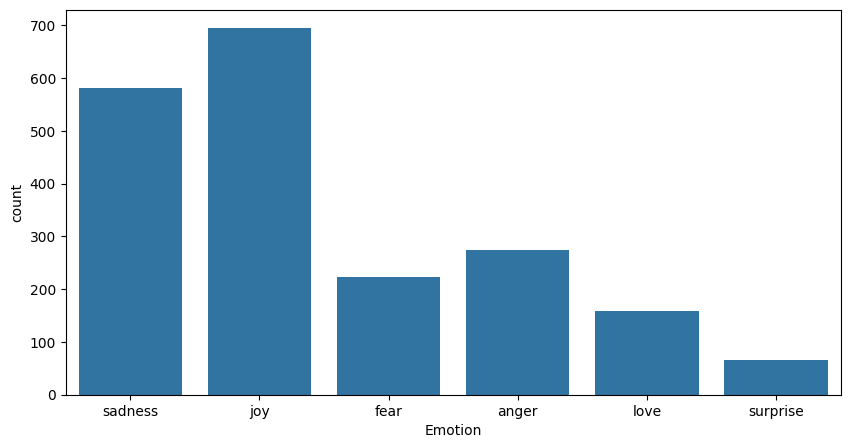

In [14]:
# Percentage of emotions present in the dataset
emotions_percentage = emotions/sum(emotions)*100
print(emotions_percentage)

# Plot the emotions vs it's count as a bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df_test_initial)

In [15]:
# To check if there are any null values present in the testing dataset
print(df_test_initial.isnull().sum())

Text       0
Emotion    0
dtype: int64


In [16]:
# Checking if there are any repeated texts in the testing dataset
print("Repeated Statements  :",df_test_initial['Text'].duplicated().sum())
df_test_initial[df_test_initial['Text'].duplicated()]

Repeated Statements  : 0


,Text,Emotion


In [17]:
# Doing the same for validation dataset
# Fetching all the emotions and it's count present in the validation dataset

emotions = df_val_initial['Emotion'].value_counts()
print(emotions)
print(f"Total entries in the training dataset : {emotions.sum()}")

Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64
Total entries in the training dataset : 2000


Emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: count, dtype: float64


<Axes: xlabel='Emotion', ylabel='count'>

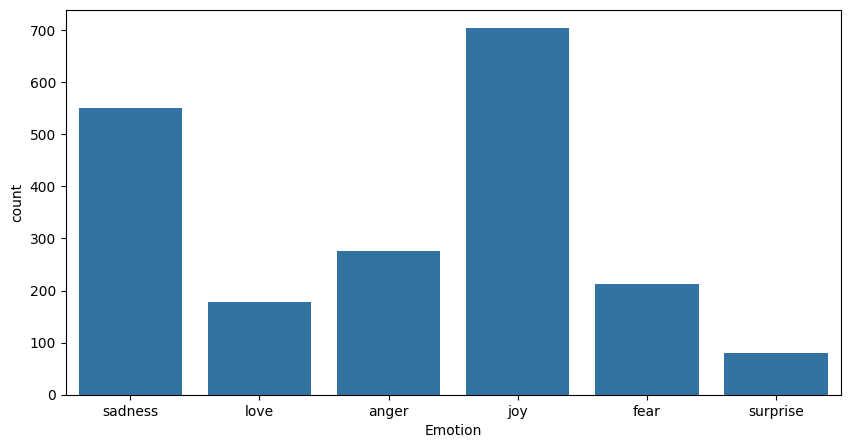

In [18]:
# Percentage of emotions present in the validation dataset
emotions_percentage = emotions/sum(emotions)*100
print(emotions_percentage)

# Plot the emotions vs it's count as a bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df_val_initial)

In [19]:
# To check if there are any null values present in the validation dataset
print(df_test_initial.isnull().sum())

Text       0
Emotion    0
dtype: int64


In [20]:
# Checking if there are any repeated texts in the validation dataset
print("Repeated Statements  :",df_test_initial['Text'].duplicated().sum())
df_test_initial[df_test_initial['Text'].duplicated()]

Repeated Statements  : 0


,Text,Emotion


In [21]:
# Data Cleaning

def convert_to_lower_case(text):
    return text.lower()

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_stop_words(text):
    return ' '.join([word for word in str(text).split() if word not in stop_words])

def get_wordnet_pos(word):
    # Map POS tag to first character that the lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)])

def clean_dataset(dataset):
    dataset.Text = dataset.Text.apply(lambda x: convert_to_lower_case(x))
    dataset.Text = dataset.Text.apply(lambda x: remove_special_characters(x))
    dataset.Text = dataset.Text.apply(lambda x: remove_punctuation(x))
    dataset.Text = dataset.Text.apply(lambda x: remove_numbers(x))
    dataset.Text = dataset.Text.apply(lambda x: remove_stop_words(x))
    dataset.Text = dataset.Text.apply(lambda x: lemmatization(x))
    return dataset

def cleaned_sentence(text):
    text = convert_to_lower_case(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_stop_words(text)
    text = lemmatization(text)
    return text

text1 = "Every time I imagine that someone I love or I could contact a serious illness, even death."
print("Original Sentence : ", text1)
print("Number of words in the Sentence : ",len(text1.split()))
cleaned1 = cleaned_sentence(text1)
print("Cleaned Sentence : ", cleaned1)
print("Stop words present in the Sentence : ",([word for word in text1.split() if word in stop_words]))

Original Sentence :  Every time I imagine that someone I love or I could contact a serious illness, even death.
Number of words in the Sentence :  17
Cleaned Sentence :  every time imagine someone love could contact serious illness even death
Stop words present in the Sentence :  ['that', 'or', 'a']


In [22]:
df_train = clean_dataset(df_train_final)
df_test = clean_dataset(df_test_initial)
df_val = clean_dataset(df_val_initial)

In [23]:
df_train.head()

,Text,Emotion
0,didnt feel humiliate,sadness
1,go feel hopeless damn hopeful around someone c...,sadness
2,im grab minute post feel greedy wrong,anger
3,ever feel nostalgic fireplace know still property,love
4,feel grouchy,anger


In [24]:
df_train.shape

(15969, 2)

In [25]:
# Data Preprocessing

X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

In [26]:
# We are training the model based on the given data and targets :

# model : The model to be trained
# data : Input data
# targets : Target data

# Returns :
# Pipeline : The trained model as a Pipelined object


def train_model(model, data, targets):
    # Creating the pipelined object
    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

def get_F1(trained_model, data, targets):
    predictions = trained_model.predict(data)
    return f1_score(targets, predictions, average=None)

In [27]:
# Training the model using Logistic Regression with the training dataset

logistic_regression_model = train_model(LogisticRegression(solver='liblinear', random_state=0), X_train, y_train)

testing = logistic_regression_model.predict(['I adore you a lot and I want to spend the rest of my life with you'])
testing

array(['joy'], dtype=object)

In [28]:
# Testing the Logistic Regression Model on the testing dataset
y_predl = logistic_regression_model.predict(X_test)

# Finding the accuracy
logistic_regression_model_accuracy = accuracy_score(y_test, y_predl)
print("Accuracy of the Logistic Regression Model : ", logistic_regression_model_accuracy)

# Calculating the F1 Score
logistic_regression_model_f1 = get_F1(logistic_regression_model, X_test, y_test)
pd.DataFrame(logistic_regression_model_f1, index=df_train['Emotion'].unique(), columns=['F1 Score'])

Accuracy of the Logistic Regression Model :  0.855


,F1 Score
sadness,0.827324
anger,0.824645
love,0.890080
surprise,0.643939
fear,0.899160
joy,0.647619


In [29]:
#Classification Report
print(classification_report(y_test, y_predl))

              precision    recall  f1-score   support

       anger       0.87      0.79      0.83       275
        fear       0.88      0.78      0.82       224
         joy       0.83      0.96      0.89       695
        love       0.81      0.53      0.64       159
     sadness       0.88      0.92      0.90       581
    surprise       0.87      0.52      0.65        66

    accuracy                           0.85      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.86      0.85      0.85      2000



In [30]:
# Training the model using SVM with the training dataset

svm_model = train_model(SVC(random_state=0), X_train, y_train)
testing = svm_model.predict(['I want to kill someone'])
testing

array(['sadness'], dtype=object)

In [31]:
y_pred_svm = svm_model.predict(X_test)
svm_model_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy : ", svm_model_accuracy)

f1_score_svm = get_F1(svm_model, X_test, y_test)
pd.DataFrame(f1_score_svm, index=df_train['Emotion'].unique() , columns=['F1 Score'])

SVM Model Accuracy :  0.853


,F1 Score
sadness,0.836773
anger,0.827907
love,0.883100
surprise,0.622047
fear,0.898723
joy,0.666667


In [32]:
# Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       anger       0.86      0.81      0.84       275
        fear       0.86      0.79      0.83       224
         joy       0.82      0.95      0.88       695
        love       0.83      0.50      0.62       159
     sadness       0.89      0.91      0.90       581
    surprise       0.82      0.56      0.67        66

    accuracy                           0.85      2000
   macro avg       0.85      0.75      0.79      2000
weighted avg       0.85      0.85      0.85      2000



In [33]:
# Training the model using RandomForest with the training dataset

random_forest_model = train_model(RandomForestClassifier(random_state=0), X_train, y_train)
testing = random_forest_model.predict(['I am singing and it sounds really fantastic !'])
testing

array(['joy'], dtype=object)

In [34]:
y_pred_rf = random_forest_model.predict(X_test)
random_forest_model_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy : ", random_forest_model_accuracy)

f1_score_rf = get_F1(random_forest_model, X_test, y_test)
pd.DataFrame(f1_score_rf, index=df_train['Emotion'].unique() , columns=['F1 Score'])

Random Forest Model Accuracy :  0.8765


,F1 Score
sadness,0.885305
anger,0.840708
love,0.906272
surprise,0.708333
fear,0.921466
joy,0.627737


In [35]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       anger       0.87      0.90      0.89       275
        fear       0.83      0.85      0.84       224
         joy       0.89      0.93      0.91       695
        love       0.79      0.64      0.71       159
     sadness       0.93      0.91      0.92       581
    surprise       0.61      0.65      0.63        66

    accuracy                           0.88      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.88      0.88      0.88      2000



In [36]:
# Training the model using Kernel SVM with the training dataset

kernel_svm_model = train_model(SVC(random_state=0, kernel="rbf"), X_train, y_train)
testing = kernel_svm_model.predict(['I want to kill someone'])
testing

array(['sadness'], dtype=object)

In [37]:
y_pred_k_svm = kernel_svm_model.predict(X_test)
k_svm_model_accuracy = accuracy_score(y_test, y_pred_k_svm)
print("SVM Model Accuracy : ", k_svm_model_accuracy)


f1_score_ksvm = get_F1(kernel_svm_model, X_test, y_test)
pd.DataFrame(f1_score_ksvm, index=df_train['Emotion'].unique() , columns=['F1 Score'])

SVM Model Accuracy :  0.853


,F1 Score
sadness,0.836773
anger,0.827907
love,0.883100
surprise,0.622047
fear,0.898723
joy,0.666667


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Train the Naive Bayes model
naive_bayes_model = make_pipeline(CountVectorizer(), MultinomialNB())
naive_bayes_model.fit(X_train, y_train)

# Make predictions
text_input = ['I am singing and it sounds really fantastic!']
testing = naive_bayes_model.predict(text_input)
testing

array(['joy'], dtype='<U8')

In [39]:
y_pred_nb = naive_bayes_model.predict(X_test)
nb_model_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Model Accuracy : ", nb_model_accuracy)

f1_score_nb = get_F1(naive_bayes_model, X_test, y_test)
pd.DataFrame(f1_score_nb, index=df_train['Emotion'].unique() , columns=['F1 Score'])

Naive Bayes Model Accuracy :  0.786


,F1 Score
sadness,0.736170
anger,0.692308
love,0.856959
surprise,0.457944
fear,0.837423
joy,0.114286


In [40]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Kernel SVM', 'Naive Bayes'],
    'Accuracy': [logistic_regression_model_accuracy, svm_model_accuracy, random_forest_model_accuracy, k_svm_model_accuracy, nb_model_accuracy]
})

models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,Random Forest,0.8765
1,Logistic Regression,0.8550
2,SVM,0.8530
3,Kernel SVM,0.8530
4,Naive Bayes,0.7860


In [83]:
# Creating a dictionary of all models
all_models = {
    'Logistic Regression': logistic_regression_model,
    'SVM': svm_model,
    'Random Forest': random_forest_model,
    'Kernel SVM': kernel_svm_model,
    'Naive Bayes': naive_bayes_model
}
# Getting the best model from the DataFrame
best_model = all_models[models.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']]

prompt = input("Enter the text : ")
testing = best_model.predict([prompt])
print("Given input text : ", prompt)
print("Predicted Emotion : ", testing[0])

Given input text :  I want to eat I'm  nungry
Predicted Emotion :  anger
